In [19]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Define the main directory and emotion categories
main_dir = 'F:\\Masters\\Thesis\\BanglaSound'
emotion_categories = ['Angry', 'Happy', 'Natural', 'Sad', 'Surprised']

# Initialize lists to store features and labels
X = []  # Features (MFCC)
y = []  # Labels (emotion categories)

# Loop through each category
for label, category in enumerate(emotion_categories):
    folder_path = os.path.join(main_dir, category)  # Get full path to category folder
    
    # Loop through each audio file in the category
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Ensure it's a .wav file
            file_path = os.path.join(folder_path, file_name)
            
            # Load audio file and extract MFCC features
            audio, sr = librosa.load(file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfcc, axis=1)  # Get the mean MFCCs
            
            # Append features and label
            X.append(mfcc_mean)
            y.append(label)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Encode labels
y_encoded = to_categorical(y, num_classes=len(emotion_categories))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Reshape data for Bi-LSTM
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Define the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(emotion_categories), activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save('bi_lstm_emotion_detection_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


E:\python\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.2697 - loss: 1.5839 - val_accuracy: 0.3287 - val_loss: 1.5320
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2892 - loss: 1.5061 - val_accuracy: 0.3565 - val_loss: 1.5014
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3503 - loss: 1.4460 - val_accuracy: 0.3287 - val_loss: 1.4519
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3764 - loss: 1.3765 - val_accuracy: 0.3843 - val_loss: 1.3938
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3869 - loss: 1.3359 - val_accuracy: 0.3611 - val_loss: 1.3615
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4352 - loss: 1.2732 - val_accuracy: 0.4444 - val_loss: 1.3366
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4021 - loss: 1.3007 - val_accuracy: 0.3843 - val_loss: 1.3149
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4468 - loss: 1.2435 - val_accuracy: 0.5093 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5708 - loss: 1.0976
Test Accuracy: 60.65%


In [20]:
from sklearn.metrics import classification_report
import numpy as np

# Predict classes for the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded test labels back to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Generate and print the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=emotion_categories)
print(report)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step
              precision    recall  f1-score   support

       Angry       0.69      0.75      0.72        44
       Happy       0.43      0.57      0.49        40
     Natural       0.75      0.81      0.78        47
         Sad       0.63      0.63      0.63        38
   Surprised       0.50      0.28      0.36        47

    accuracy                           0.61       216
   macro avg       0.60      0.61      0.60       216
weighted avg       0.60      0.61      0.60       216



In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.utils import to_categorical

# Define the main directory and emotion categories
main_dir = 'F:\\Masters\\Thesis\\BanglaSound'
emotion_categories = ['Angry', 'Happy', 'Natural', 'Sad', 'Surprised']

# Initialize lists to store features and labels
X = []  # Features (MFCC)
y = []  # Labels (emotion categories)

# Loop through each category
for label, category in enumerate(emotion_categories):
    folder_path = os.path.join(main_dir, category)
    
    # Loop through each audio file in the category
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Ensure it's a .wav file
            file_path = os.path.join(folder_path, file_name)
            
            # Load audio file and extract MFCC features
            audio, sr = librosa.load(file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            
            # Transpose the MFCC to match time-first (time, features) format
            mfcc_transposed = mfcc.T
            
            # Append features and label
            X.append(mfcc_transposed)
            y.append(label)

# Convert to numpy arrays
X = np.array(X, dtype=object)  # Object type since MFCC sequences may have different lengths
y = np.array(y)

# Pad sequences to the same length
max_len = max([x.shape[0] for x in X])  # Find the longest sequence
X_padded = np.zeros((len(X), max_len, 13))  # Zero-padding with shape (samples, max_len, n_mfcc)

for i, x in enumerate(X):
    X_padded[i, :x.shape[0], :] = x  # Pad each MFCC sequence with zeros

# Normalize features
X_padded = (X_padded - np.mean(X_padded, axis=0)) / np.std(X_padded, axis=0)

# Encode labels
y_encoded = to_categorical(y, num_classes=len(emotion_categories))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Define Transformer model components
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-Head Self-Attention
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])
    out1 = LayerNormalization(epsilon=1e-6)(out1)

    # Feed-Forward Neural Network
    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(dropout)(ffn_output)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    out2 = Add()([out1, ffn_output])
    return LayerNormalization(epsilon=1e-6)(out2)

# Build the Transformer model
def build_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Add multiple transformer encoder layers
    x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=128, dropout=0.1)
    x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=128, dropout=0.1)
    x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=128, dropout=0.1)

    # Global Average Pooling
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # Dense layers for classification
    x = Dropout(0.2)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Set model parameters
input_shape = (X_train.shape[1], X_train.shape[2])  # (max_len, n_mfcc)
num_classes = len(emotion_categories)

# Build the model
model = build_transformer_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Save the model
model.save('transformer_emotion_detection_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 253s 7s/step - accuracy: 0.2861 - loss: 1.5495 - val_accuracy: 0.3750 - val_loss: 1.3942
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.4193 - loss: 1.3458 - val_accuracy: 0.4028 - val_loss: 1.3549
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.4623 - loss: 1.2974 - val_accuracy: 0.5046 - val_loss: 1.2264
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.4585 - loss: 1.2584 - val_accuracy: 0.5278 - val_loss: 1.1823
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.4716 - loss: 1.2095 - val_accuracy: 0.5509 - val_loss: 1.1629
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.5098 - loss: 1.1616 - val_accuracy: 0.5972 - val_loss: 1.0587
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.5266 - loss: 1.0965 - val_accuracy: 0.5648 - val_loss: 1.0297
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.5827 - loss: 1.0509 - val_accuracy: 0.5972 - val_loss

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 342s 8s/step - accuracy: 0.3047 - loss: 1.5217 - val_accuracy: 0.4028 - val_loss: 1.3440
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.4285 - loss: 1.3290 - val_accuracy: 0.4676 - val_loss: 1.2907
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.4739 - loss: 1.2559 - val_accuracy: 0.4676 - val_loss: 1.2479
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.4812 - loss: 1.2002 - val_accuracy: 0.5139 - val_loss: 1.1830
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.5375 - loss: 1.1512 - val_accuracy: 0.5833 - val_loss: 1.0889
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.5723 - loss: 1.1043 - val_accuracy: 0.5602 - val_loss: 1.1146
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - accuracy: 0.5503 - loss: 1.1052 - val_accuracy: 0.5417 - val_loss: 1.1196
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.5463 - loss: 1.1091 - val_accuracy: 0.5324 - v

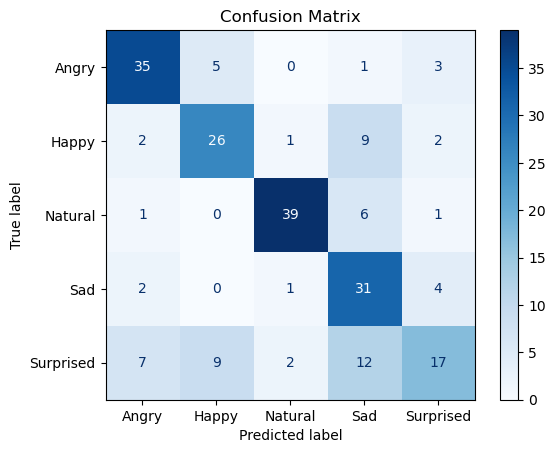

In [4]:
import os
import numpy as np
import librosa
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the main directory and emotion categories
main_dir = 'F:\\Masters\\Thesis\\BanglaSound'
emotion_categories = ['Angry', 'Happy', 'Natural', 'Sad', 'Surprised']

# Initialize lists to store features and labels
X = []  # Features (MFCC)
y = []  # Labels (emotion categories)

# Loop through each category
for label, category in enumerate(emotion_categories):
    folder_path = os.path.join(main_dir, category)
    
    # Loop through each audio file in the category
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Ensure it's a .wav file
            file_path = os.path.join(folder_path, file_name)
            
            # Load audio file and extract MFCC features
            audio, sr = librosa.load(file_path, sr=None)
            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
            
            # Transpose the MFCC to match time-first (time, features) format
            mfcc_transposed = mfcc.T
            
            # Append features and label
            X.append(mfcc_transposed)
            y.append(label)

# Convert to numpy arrays
X = np.array(X, dtype=object)  # Object type since MFCC sequences may have different lengths
y = np.array(y)

# Pad sequences to the same length
max_len = max([x.shape[0] for x in X])  # Find the longest sequence
X_padded = np.zeros((len(X), max_len, 13))  # Zero-padding with shape (samples, max_len, n_mfcc)

for i, x in enumerate(X):
    X_padded[i, :x.shape[0], :] = x  # Pad each MFCC sequence with zeros

# Normalize features
X_padded = (X_padded - np.mean(X_padded, axis=0)) / np.std(X_padded, axis=0)

# Encode labels
y_encoded = to_categorical(y, num_classes=len(emotion_categories))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Define Transformer model components
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    attn_output = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = Add()([inputs, attn_output])
    out1 = LayerNormalization(epsilon=1e-6)(out1)

    ffn_output = Dense(ff_dim, activation="relu")(out1)
    ffn_output = Dropout(dropout)(ffn_output)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    out2 = Add()([out1, ffn_output])
    return LayerNormalization(epsilon=1e-6)(out2)

# Build the Transformer model
def build_transformer_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = transformer_encoder(inputs, head_size=256, num_heads=4, ff_dim=128, dropout=0.1)
    x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=128, dropout=0.1)
    x = transformer_encoder(x, head_size=256, num_heads=4, ff_dim=128, dropout=0.1)

    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    x = Dropout(0.2)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

# Set model parameters
input_shape = (X_train.shape[1], X_train.shape[2])  # (max_len, n_mfcc)
num_classes = len(emotion_categories)

# Build and compile the model
model = build_transformer_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix code
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # True labels

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotion_categories)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [5]:

# Classification report code
report = classification_report(y_true_classes, y_pred_classes, target_names=emotion_categories)
print(report)


              precision    recall  f1-score   support

       Angry       0.74      0.80      0.77        44
       Happy       0.65      0.65      0.65        40
     Natural       0.91      0.83      0.87        47
         Sad       0.53      0.82      0.64        38
   Surprised       0.63      0.36      0.46        47

    accuracy                           0.69       216
   macro avg       0.69      0.69      0.68       216
weighted avg       0.70      0.69      0.68       216

